In [1]:
# import libraries for analysis
import pandas as pd              
import numpy as np                  
import seaborn as sns                            
import matplotlib.pyplot as plt                           
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [70]:
# load the data and explore
df = pd.read_csv('./kaggale_pizza.csv', encoding='cp1252')
df.head(5)

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",1/5/2024 18:30,1/5/2024 18:45,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2/14/2024 20:00,2/14/2024 20:25,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",3/21/2024 12:15,3/21/2024 12:35,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",4/10/2024 19:45,4/10/2024 20:10,25,XL,Cheese Burst,5,4.5,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",5/5/2024 13:00,5/5/2024 13:20,20,Medium,Non-Veg,3,2.0,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order ID                      1004 non-null   object 
 1   Restaurant Name               1004 non-null   object 
 2   Location                      1004 non-null   object 
 3   Order Time                    1004 non-null   object 
 4   Delivery Time                 1004 non-null   object 
 5   Delivery Duration (min)       1004 non-null   int64  
 6   Pizza Size                    1004 non-null   object 
 7   Pizza Type                    1004 non-null   object 
 8   Toppings Count                1004 non-null   int64  
 9   Distance (km)                 1004 non-null   float64
 10  Traffic Level                 1004 non-null   object 
 11  Payment Method                1004 non-null   object 
 12  Is Peak Hour                  1004 non-null   bool   
 13  Is 

In [72]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['order_id', 'restaurant_name', 'location', 'order_time',
       'delivery_time', 'delivery_duration_(min)', 'pizza_size', 'pizza_type',
       'toppings_count', 'distance_(km)', 'traffic_level', 'payment_method',
       'is_peak_hour', 'is_weekend', 'delivery_efficiency_(min/km)',
       'topping_density', 'order_month', 'payment_category',
       'estimated_duration_(min)', 'delay_(min)', 'is_delayed',
       'pizza_complexity', 'traffic_impact', 'order_hour',
       'restaurant_avg_time'],
      dtype='object')

In [ ]:
# head = list(df.columns)
# head = pd.Series(head)

# head = head.str.lower()
# head = head.str.replace(' ','_')
# # head = head.str.strip('', '_')
# head


0                         order_id
1                  restaurant_name
2                         location
3                       order_time
4                    delivery_time
5          delivery_duration_(min)
6                       pizza_size
7                       pizza_type
8                   toppings_count
9                    distance_(km)
10                   traffic_level
11                  payment_method
12                    is_peak_hour
13                      is_weekend
14    delivery_efficiency_(min/km)
15                 topping_density
16                     order_month
17                payment_category
18        estimated_duration_(min)
19                     delay_(min)
20                      is_delayed
21                pizza_complexity
22                  traffic_impact
23                      order_hour
24             restaurant_avg_time
dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   order_id                      1004 non-null   object 
 1   restaurant_name               1004 non-null   object 
 2   location                      1004 non-null   object 
 3   order_time                    1004 non-null   object 
 4   delivery_time                 1004 non-null   object 
 5   delivery_duration_(min)       1004 non-null   int64  
 6   pizza_size                    1004 non-null   object 
 7   pizza_type                    1004 non-null   object 
 8   toppings_count                1004 non-null   int64  
 9   distance_(km)                 1004 non-null   float64
 10  traffic_level                 1004 non-null   object 
 11  payment_method                1004 non-null   object 
 12  is_peak_hour                  1004 non-null   bool   
 13  is_

In [73]:
df.head(3)

,order_id,restaurant_name,location,order_time,delivery_time,delivery_duration_(min),pizza_size,pizza_type,toppings_count,distance_(km),...,topping_density,order_month,payment_category,estimated_duration_(min),delay_(min),is_delayed,pizza_complexity,traffic_impact,order_hour,restaurant_avg_time
0,ORD001,Domino's,"New York, NY",1/5/2024 18:30,1/5/2024 18:45,15,Medium,Veg,3,2.5,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2/14/2024 20:00,2/14/2024 20:25,25,Large,Non-Veg,4,5.0,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",3/21/2024 12:15,3/21/2024 12:35,20,Small,Vegan,2,3.0,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221


In [76]:
# convert columns to data format
df['order_time']    = pd.to_datetime(df['order_time'])
df['delivery_time'] = pd.to_datetime(df['delivery_time'])
df['is_delayed']    = df['is_delayed'].astype('bool')
df['pizza_size']    = pd.Categorical(df['pizza_size'])
df['pizza_type']    = pd.Categorical(df['pizza_type'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   order_id                      1004 non-null   object        
 1   restaurant_name               1004 non-null   object        
 2   location                      1004 non-null   object        
 3   order_time                    1004 non-null   datetime64[ns]
 4   delivery_time                 1004 non-null   datetime64[ns]
 5   delivery_duration_(min)       1004 non-null   int64         
 6   pizza_size                    1004 non-null   category      
 7   pizza_type                    1004 non-null   category      
 8   toppings_count                1004 non-null   int64         
 9   distance_(km)                 1004 non-null   float64       
 10  traffic_level                 1004 non-null   object        
 11  payment_method                

In [ ]:
df['state'] =  df['location'].str.split(',').str[-1].str.strip()

df['state']

0       NY
1       CA
2       IL
3       FL
4       TX
        ..
999     NM
1000    GA
1001    NE
1002    KY
1003    WI
Name: state, Length: 1004, dtype: object

In [128]:
# city column
df['city']  =  df['location'].str.split(',').str[-2].str.strip().str.replace(' ','_')
df['city']

0          New_York
1       Los_Angeles
2           Chicago
3             Miami
4            Dallas
           ...     
999     Albuquerque
1000        Atlanta
1001          Omaha
1002     Louisville
1003      Milwaukee
Name: city, Length: 1004, dtype: object

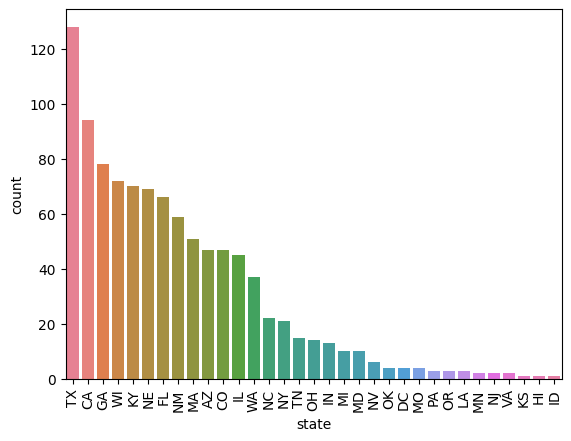

In [129]:
sorted_df = df['state'].value_counts().sort_values(ascending=False)
sorted_df = pd.DataFrame(sorted_df)

sorted_df
sns.barplot(data=sorted_df, x='state', y='count', hue='state')
plt.xticks(rotation=90)
plt.show()
# sns.countplot(data=df, x='state', hue='state')
# plt.xticks(rotation=90)
# plt.show()

In [130]:
str_col = ['gab', 'ess', 'nah']
str_col[-1]

'nah'

In [131]:
df['pizza_type'].nunique()

12

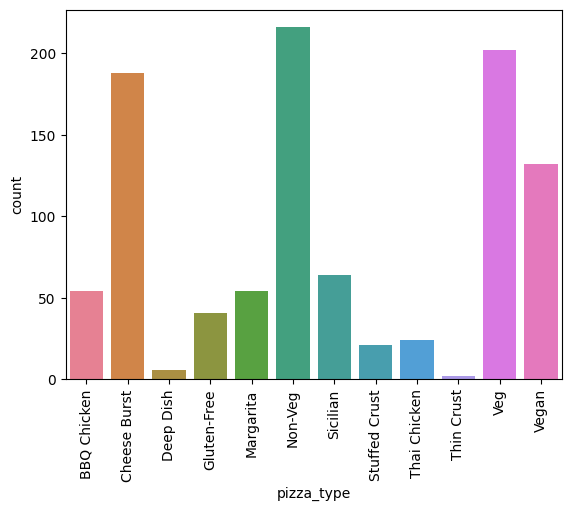

In [137]:
# sns.countplot(data=df, x='pizza_type')
sorted_df1 = df['pizza_type'].value_counts().sort_values(ascending=True)
sorted_df1 = sorted_df1.reset_index()
# sorted_df1 = pd.DataFrame(sorted_df1)

sorted_df1

# plot the data
sns.barplot(data=sorted_df1, x= 'pizza_type', y='count', hue='pizza_type')
plt.xticks(rotation = 90)
plt.show()

In [140]:
df['restaurant_name'].unique()

array(["Domino's", "Papa John's", 'Little Caesars', 'Pizza Hut',
       "Marco's Pizza", 'Marco’s Pizza'], dtype=object)